In [2]:
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
import numpy as np
import de2 as de
import multiprocessing as mp
import makeqx as mkq
import oldqx as oqx


def rndtop5(x):
    return np.round(x*2.0)/2

def tmm_wrapper2(arg):
    args, kwargs = arg
    return oqx.tmm_eval_wsweep(*args, **kwargs)

def arc_par(pop, **kwargs):
    jobs = []
    pool=mp.Pool(90)
    for indiv in pop:
        #indiv = indiv.reshape((int(indiv.size/2), 2))
        #indiv[:,1] = mkq.digitize_qx(indiv[:,1], dlevels=2)
        indiv = rndtop5(indiv)
        #indiv = indiv.flatten()
        jobs.append((indiv, 0))
    arg = [(j, kwargs) for j in jobs]
    answ = np.array(pool.map(tmm_wrapper2, arg))
    pool.close()
    return answ




In [35]:
dataset_size = 200000

# parameters of the dataset
num_layers = 16
num_lpoints = 128
# lam_min = 400.0
# lam_max = 800.0
d_min = 0.5
d_max = 100

lam_min = 400.0  # this is lam/d
lam_max = 800.0       # this is lam/d

lams = np.linspace(lam_min, lam_max, endpoint=True, num=num_lpoints)
# lam_inv = np.linspace(1/lam_min, 1/lam_max, num=num_lpoints, endpoint=True)
# lams = 1.0/lam_inv


#lams = np.linspace(lam_low, lam_high, endpoint=True, num=lam_pts)
#lam_inv = np.linspace(1/400.0, 1/800.0, num=num_lpoints, endpoint=True)
#lams = 1.0/lam_inv
dataset_X = np.random.uniform(0,1,num_layers*dataset_size).astype(float).reshape(dataset_size, num_layers)

# for ds in dataset_X:
#     ds = ds/np.sum(ds)

#lams = np.linspace(lam_min, lam_max, num_lpoints, endpoint=True)
dataset_Y = np.zeros((dataset_size,num_lpoints))

dataset_Y = arc_par( d_min + (d_max - d_min)*dataset_X,  lam_low=lam_min, lam_high=lam_max, lam_pts = num_lpoints)

(0, 100)

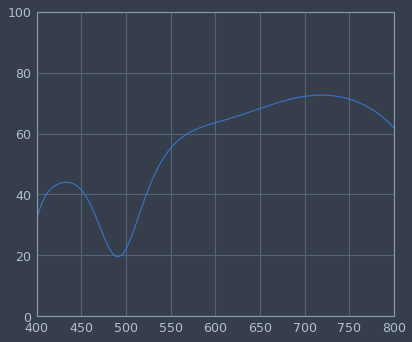

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

#plt.plot(dataset_Y[  0  ])
plt.plot(lams, dataset_Y[  np.random.randint(0, 1000) ])

plt.xlim([400,800])
plt.ylim([0, 100])

In [57]:
import h5py
h5f = h5py.File('./datasets/s16_d_siti_2.h5', 'w')
h5f.create_dataset('sizes', data=dataset_X)
h5f.create_dataset('spectrum', data=dataset_Y)
h5f.close()

In [ ]:
dataset_X.shape

In [34]:
lams

array([400.        , 403.1496063 , 406.2992126 , 409.4488189 ,
       412.5984252 , 415.7480315 , 418.8976378 , 422.04724409,
       425.19685039, 428.34645669, 431.49606299, 434.64566929,
       437.79527559, 440.94488189, 444.09448819, 447.24409449,
       450.39370079, 453.54330709, 456.69291339, 459.84251969,
       462.99212598, 466.14173228, 469.29133858, 472.44094488,
       475.59055118, 478.74015748, 481.88976378, 485.03937008,
       488.18897638, 491.33858268, 494.48818898, 497.63779528,
       500.78740157, 503.93700787, 507.08661417, 510.23622047,
       513.38582677, 516.53543307, 519.68503937, 522.83464567,
       525.98425197, 529.13385827, 532.28346457, 535.43307087,
       538.58267717, 541.73228346, 544.88188976, 548.03149606,
       551.18110236, 554.33070866, 557.48031496, 560.62992126,
       563.77952756, 566.92913386, 570.07874016, 573.22834646,
       576.37795276, 579.52755906, 582.67716535, 585.82677165,
       588.97637795, 592.12598425, 595.27559055, 598.42